# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')
num_data = data_train.shape[0]

## plot the data

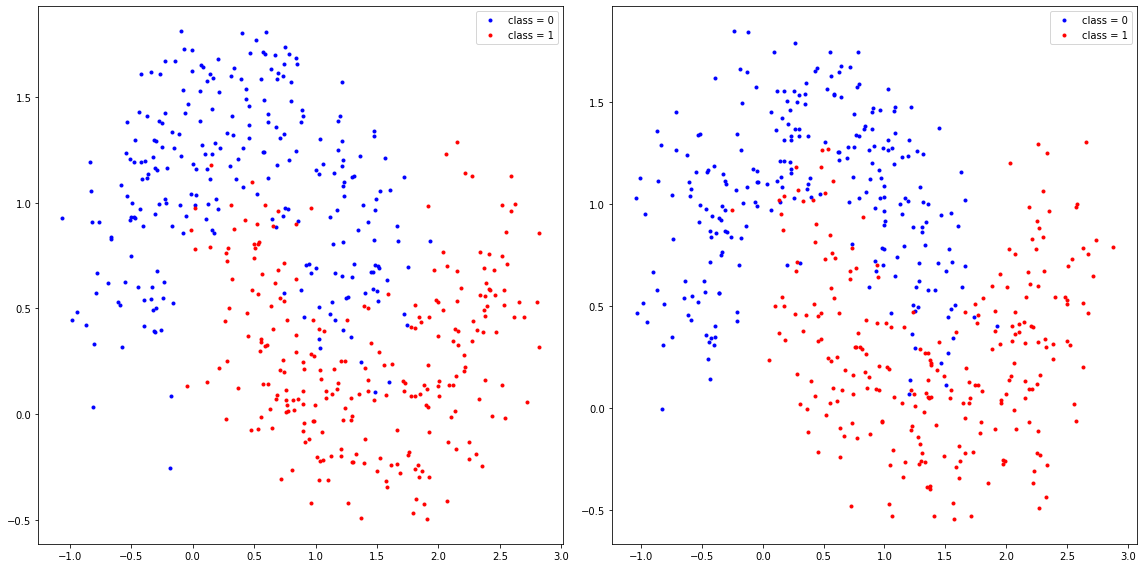

In [3]:
x_1_0 = np.zeros(250)
y_1_0 = np.zeros(250)
for i in range(250):
    x_1_0[i] = data_train[i][0]
    y_1_0[i] = data_train[i][1]
x_1_1 = np.zeros(250)
y_1_1 = np.zeros(250)
for i in range(250):
    x_1_1[i] = data_train[i+250][0]
    y_1_1[i] = data_train[i+250][1]
    
x_2_0 = np.zeros(250)
y_2_0 = np.zeros(250)
for i in range(250):
    x_2_0[i] = data_test[i][0]

    y_2_0[i] = data_test[i][1]
x_2_1 = np.zeros(250)
y_2_1 = np.zeros(250)
for i in range(250):
    x_2_1[i] = data_test[i+250][0]
    y_2_1[i] = data_test[i+250][1]

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(x_1_0, y_1_0,'.', color='blue', label = 'class = 0')
plt.plot(x_1_1, y_1_1,'.', color='red', label = 'class = 1')
plt.legend()

plt.subplot(122)
plt.plot(x_2_0, y_2_0, '.', color = 'blue', label = 'class = 0')
plt.plot(x_2_1, y_2_1, '.', color = 'red', label = 'class = 1')
plt.legend()




plt.tight_layout()
plt.show()

## define feature function

In [4]:
x_train = np.zeros(num_data)
y_train = np.zeros(num_data)
label_train = np.zeros(num_data)
for i in range(num_data):
    x_train[i] = data_train[i][0]
    y_train[i] = data_train[i][1]
    label_train[i] = data_train[i][2]

In [5]:
x_test = np.zeros(num_data)
y_test = np.zeros(num_data)
label_test = np.zeros(num_data)
for i in range(num_data):
    x_test[i] = data_test[i][0]
    y_test[i] = data_test[i][1]
    label_test[i] = data_test[i][2]

In [6]:
def feature_function(x, y):
    feature = []
    feature.append(-3)
    feature.append(x)
    feature.append(x**2)
    feature.append(x**3)

    feature.append(np.cos(x))
    feature.append(y)
    feature = np.array(feature)
    return feature

In [7]:
f_train = []
for i in range(num_data):
    val = feature_function(x_train[i], y_train[i])
    f_train.append(val)
f_train = np.array(f_train) 
f_train = f_train.T

In [8]:
f_test = []
for i in range(num_data):
    val_2 = feature_function(x_test[i], y_test[i])
    f_test.append(val_2)
f_test = np.array(f_test)
f_test = f_test.T

## define regression function based on the feature function

In [9]:
def regression_function(theta, feature):
    value = np.matmul(theta.T,feature)
    return value

## define regularization function on the model parameters

In [10]:
def regularization_function(theta, alpha):
    value = (alpha/2) * np.matmul(theta.T, theta)
    return value

## define sigmoid function

In [11]:
def logistic_function(theta, feature):
    val = regression_function(theta, feature)
    z = 1/(1 + np.exp(-val))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [12]:
def compute_loss_feature(theta, feature, label, alpha):
    
    z = logistic_function(theta, feature)
    loss = (-label * np.log(z + np.finfo(float).eps)) - (1-label)*np.log(1-z + np.finfo(float).eps)
    loss = sum(loss)/num_data + regularization_function(theta, alpha)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [13]:
def compute_gradient_feature(theta, feature, label, alpha):
    
    z = logistic_function(theta, feature)
    grad=(1/num_data) * np.matmul(feature, (z-label))
    
    return grad

## compute the accuracy

In [14]:
def compute_accuracy(theta, feature, label):
    val = np.matmul(theta.T,feature)
    z = 1/(1 + np.exp(-val)) 
    result = []
    for i in range(num_data):
        if z[i] >= 0.5:
            z[i] = 1
        else:
            z[i] = 0
    for i in range(num_data):
        if z[i] != label[i]:
            result.append(0)
        else:
            result.append(1)
    accuracy = sum(result)/len(result)
    return accuracy

## gradient descent for the model parameters $\theta$

In [15]:
num_iteration   = 30000    
learning_rate   = 0.5
alpha           = 0.00001
theta = np.array((0,0,0,0,0,0))



In [16]:
theta_iteration             = np.zeros((num_iteration, 6))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [17]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta ,f_train,label_train, alpha)
    loss    = compute_loss_feature(theta, f_train, label_train, alpha)
    loss_test = compute_loss_feature(theta, f_test, label_test, alpha)
    accuracy_train = compute_accuracy(theta, f_train, label_train)
    accuracy_test = compute_accuracy(theta, f_test, label_test)
    
    
    theta_iteration[i] = theta
    loss_iteration_train[i]   = loss
    loss_iteration_test[i] = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i] = accuracy_test

In [18]:
theta_optimal = theta_iteration[-1]

## compute accuracy of the classifiers

In [19]:
accuracy_train  = compute_accuracy(theta_optimal, f_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, f_test, label_test)

## plot the results

In [20]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration_train, '-', color='red', label = 'loss_train')
    plt.plot(loss_iteration_test, '-', color='blue', label = 'loss_test')
    plt.legend(loc="center right")

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [21]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red', label = 'accuracy_train')
    plt.plot(accuracy_iteration_test, '-', color='blue', label = 'accuracy_test')
    plt.legend(loc="center right")
    

    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [22]:
def plot_data(data_train, data_test):
    
    x_1_0 = np.zeros(250)
    y_1_0 = np.zeros(250)
    for i in range(250):
        x_1_0[i] = data_train[i][0]
        y_1_0[i] = data_train[i][1]
    x_1_1 = np.zeros(250)
    y_1_1 = np.zeros(250)
    for i in range(250):
        x_1_1[i] = data_train[i+250][0]
        y_1_1[i] = data_train[i+250][1]

    x_2_0 = np.zeros(250)
    y_2_0 = np.zeros(250)
    for i in range(250):
        x_2_0[i] = data_test[i][0]

        y_2_0[i] = data_test[i][1]
    x_2_1 = np.zeros(250)
    y_2_1 = np.zeros(250)
    for i in range(250):
        x_2_1[i] = data_test[i+250][0]
        y_2_1[i] = data_test[i+250][1]
    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.plot(x_1_0, y_1_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1_1, y_1_1,'.', color='red', label = 'class = 1')
    plt.legend()

    plt.subplot(122)
    plt.plot(x_2_0, y_2_0, '.', color = 'blue', label = 'class = 0')
    plt.plot(x_2_1, y_2_1, '.', color = 'red', label = 'class = 1')
    plt.legend()




plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [23]:

def plot_model_parameter(theta_iteration):


    theta0_iteration = np.zeros(30000)
    theta1_iteration = np.zeros(30000)
    theta2_iteration = np.zeros(30000)
    theta3_iteration = np.zeros(30000)
    theta4_iteration = np.zeros(30000)
    theta5_iteration = np.zeros(30000)
    
    for i in range(30000):
        theta0_iteration[i] = theta_iteration[i][0]
        theta1_iteration[i] = theta_iteration[i][1]
        theta2_iteration[i] = theta_iteration[i][2]
        theta3_iteration[i] = theta_iteration[i][3]
        theta4_iteration[i] = theta_iteration[i][4]
        theta5_iteration[i] = theta_iteration[i][5]
            
            
    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(theta0_iteration, '-', color='red', label = 'theta0')
    plt.plot(theta1_iteration, '-', color='green', label = 'theta1')
    plt.plot(theta2_iteration, '-', color='blue', label = 'theta2')
    plt.plot(theta3_iteration, '-', color='yellow', label = 'theta3')
    plt.plot(theta4_iteration, '-', color='orange', label = 'theta4')
    plt.plot(theta5_iteration, '-', color='black', label = 'theta5')

    plt.xlabel('iteration')
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.show()

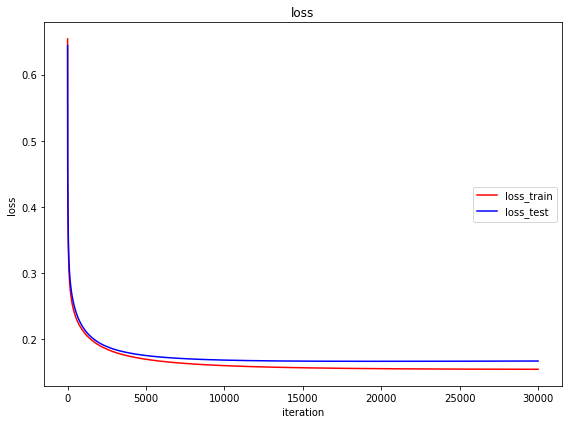

In [24]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

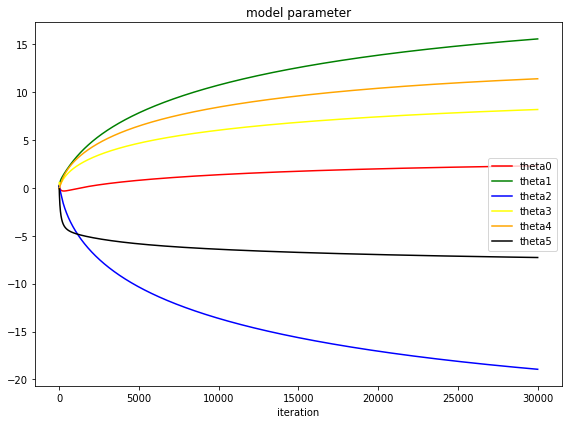

In [25]:
plot_model_parameter(theta_iteration)

In [26]:
X0  = np.arange(-2,4, 0.1)
X1  = np.arange(-1,3, 0.1)
XX,YY = np.meshgrid(X0, X1)

ZZ = theta_optimal[0] * (-3) +theta_optimal[1] * XX + theta_optimal[2] * (XX**2)+ theta_optimal[3] * (XX**3) + theta_optimal[4] * (np.cos(XX))+ theta_optimal[5] * (YY)

In [27]:
def plot_classifier(XX,YY,ZZ, data):
    x_0 = np.zeros(250)
    y_0 = np.zeros(250)
    for i in range(250):
        x_0[i] = data[i][0]
        y_0[i] = data[i][1]
    x_1 = np.zeros(250)
    y_1 = np.zeros(250)
    for i in range(250):
        x_1[i] = data[i+250][0]
        y_1[i] = data[i+250][1]
    plt.figure(figsize=(8,8))
    plt.axis('equal')
    plt.contourf(XX, YY, ZZ, levels = np.linspace(ZZ.min(), ZZ.max()),cmap="RdBu_r")
    plt.colorbar()
    plt.contour(XX,YY,ZZ,levels=0, linewidths=1, colors='k')

    plt.plot(x_0, y_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1, y_1,'.', color='red', label = 'class = 1')
    plt.legend()

    plt.tight_layout()
    plt.show()

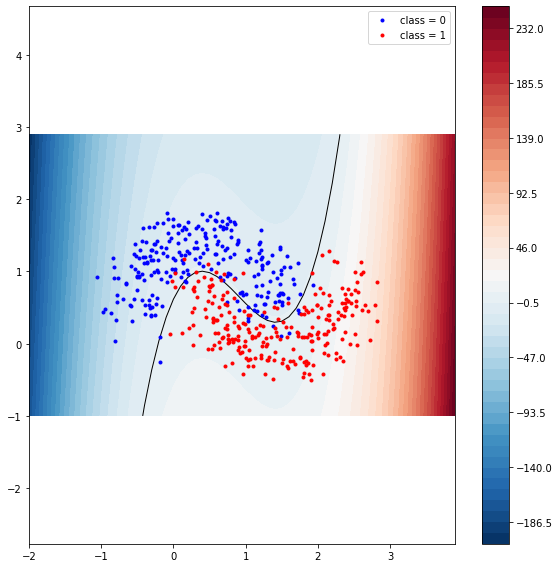

In [28]:
plot_classifier(XX,YY,ZZ, data_train)

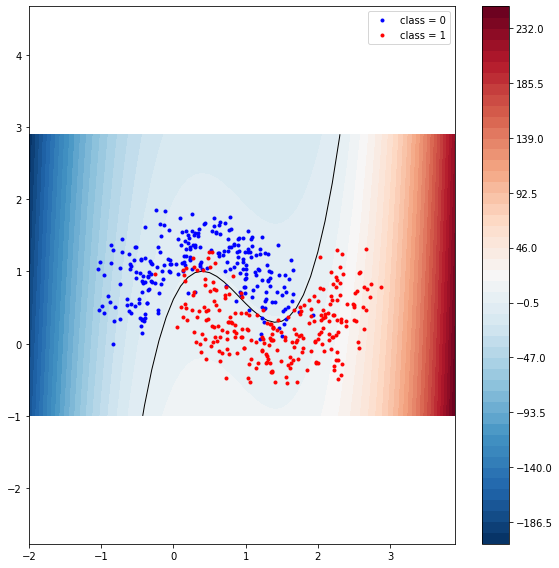

In [29]:
plot_classifier(XX,YY,ZZ, data_test)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

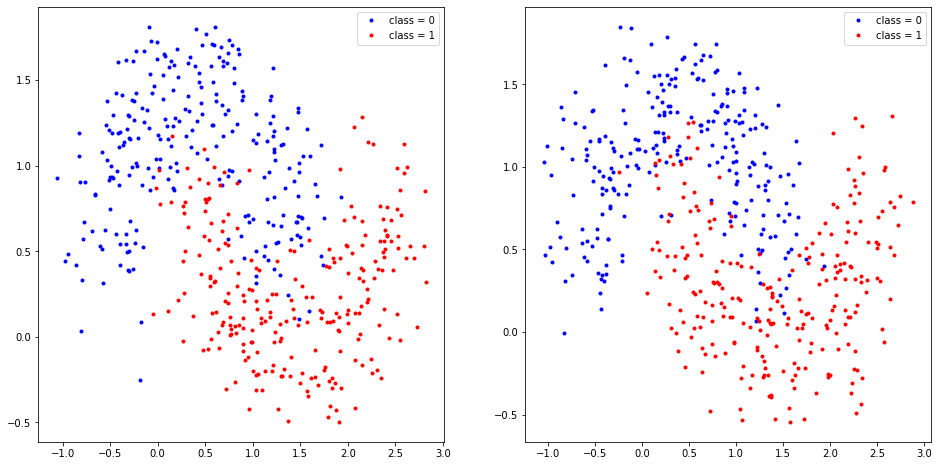

In [30]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

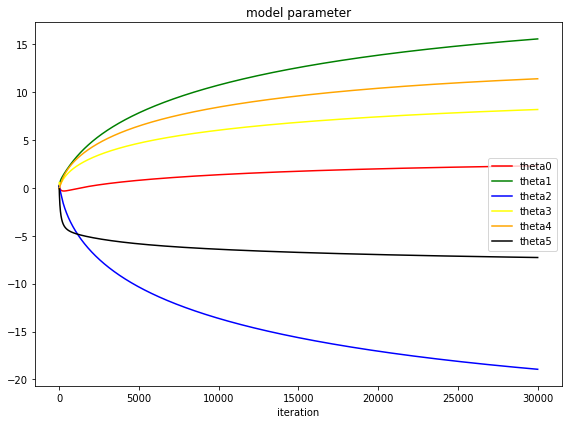

In [31]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

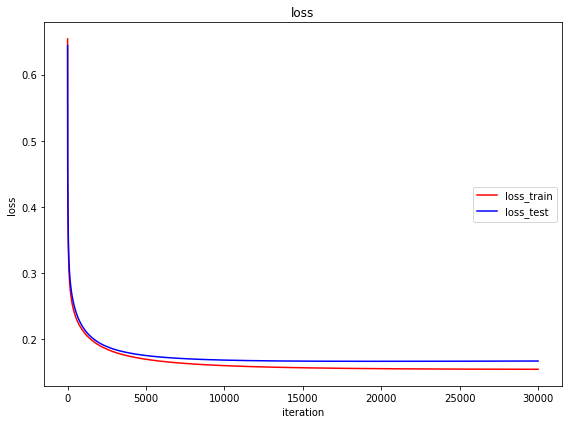

In [32]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

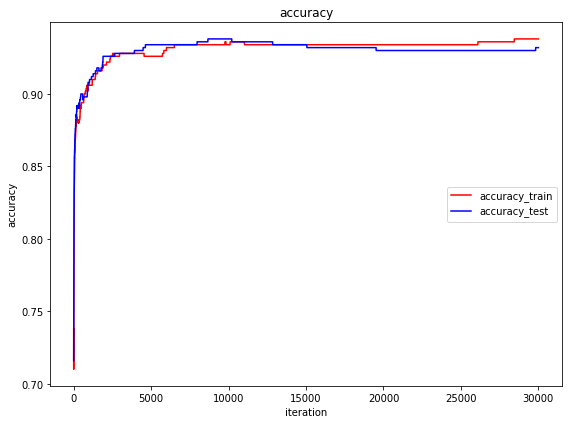

In [33]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

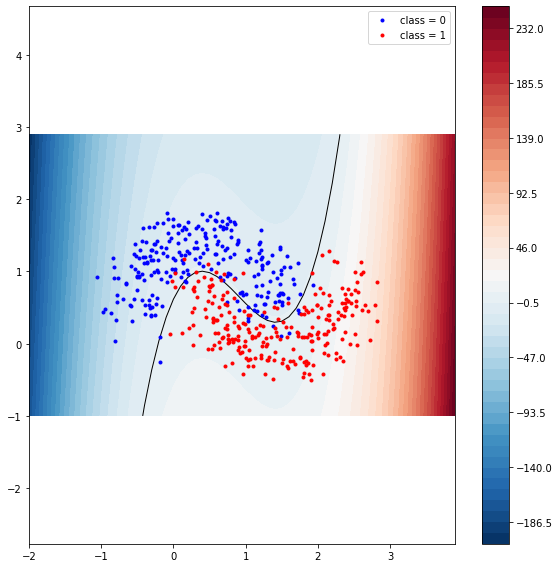

In [34]:
plot_classifier(XX,YY,ZZ, data_train)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

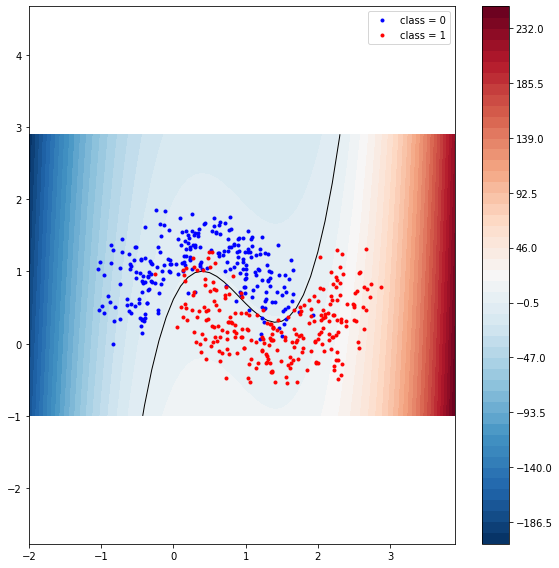

In [35]:
plot_classifier(XX,YY,ZZ, data_test)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [36]:
print("accuract(train) : %.5f" % (accuracy_train))
print("accuract(test) : %.5f" % (accuracy_test))

accuract(train) : 0.93800
accuract(test) : 0.93200
